Name: I-Ting Yu, Github: eatingyu0820, USC ID: 5350526235

# HM1 - Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.1


In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_table('…/data/vertebral_column_data/column_2C.dat', 
                   sep = "\s+", #separator whitespace             
                   header = None )

In [26]:
# Label name: pelvic incidence, pelvic tilt, lumbar lordosis angle, 
#            sacral slope, pelvic radius, grade of spondylolisthesis
# Status: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB)
df = df.rename(columns={ 0: 'pelvic incidence', 1: 'pelvic tilt',  2: 'lumbar lordosis angle',
                         3: 'sacral slope', 4: 'pelvic radius', 5: 'grade of spondylolisthesis',  
                         6: 'class'})

In [27]:
df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


### (b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

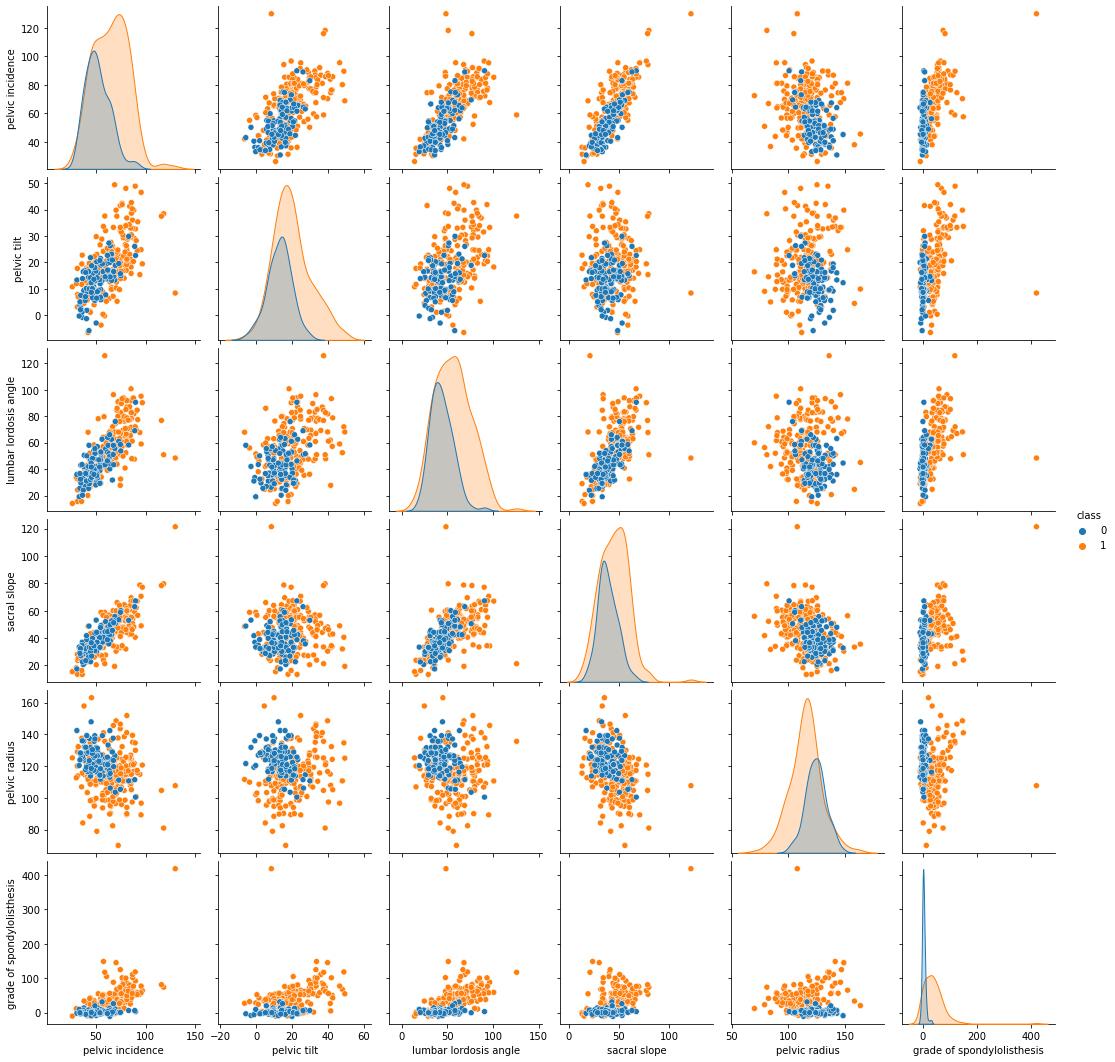

In [29]:
# A binary classification task NO=0 and AB=1.
# Color and style change according to category

df = df.replace({"AB":1, "NO":0})
#df

# Create the pairplot
# Hue: which column in the data frame should be used for colour encoding
sns.pairplot(df, hue = "class")

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

<AxesSubplot:xlabel='class', ylabel='grade of spondylolisthesis'>

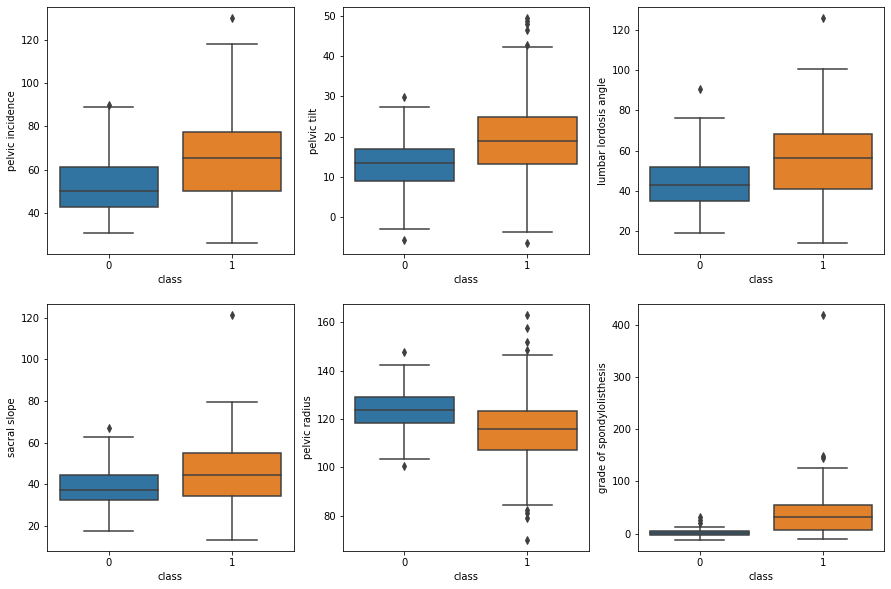

In [30]:
fig, axes = plt.subplots(2, 3, figsize = (15,10))

# Label name: pelvic incidence, pelvic tilt, lumbar lordosis angle, 
#            sacral slope, pelvic radius, grade of spondylolisthesis
# axes - location of plot
sns.boxplot(ax=axes[0,0], data= df, x="class", y = "pelvic incidence")
sns.boxplot(ax=axes[0,1], data= df, x="class", y = "pelvic tilt")
sns.boxplot(ax=axes[0,2], data= df, x="class", y = "lumbar lordosis angle")
sns.boxplot(ax=axes[1,0], data= df, x="class", y = "sacral slope")
sns.boxplot(ax=axes[1,1], data= df, x="class", y = "pelvic radius")
sns.boxplot(ax=axes[1,2], data= df, x="class", y = "grade of spondylolisthesis")

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.


In [31]:
# concat - Concatenate pandas objects along a particular axis with optional set logic along the other axes.
# .concat([x,y])
# Combine two DataFrame objects with identical rows.
train_df = pd.concat([df[df["class"]==0][:70], df[df["class"]==1][:140]])
test_df = pd.concat([df[df["class"]==0][70:], df[df["class"]==1][140:]])
train_df, test_df

(     pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
 210             38.51        16.96                  35.11         21.54   
 211             54.92        18.97                  51.60         35.95   
 212             44.36         8.95                  46.90         35.42   
 213             48.32        17.45                  48.00         30.87   
 214             45.70        10.66                  42.58         35.04   
 ..                ...          ...                    ...           ...   
 135             77.12        30.35                  77.48         46.77   
 136             88.02        39.84                  81.77         48.18   
 137             83.40        34.31                  78.42         49.09   
 138             72.05        24.70                  79.87         47.35   
 139             85.10        21.07                  91.73         64.03   
 
      pelvic radius  grade of spondylolisthesis  class  
 210         127.63          

### (c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [32]:
from sklearn.metrics.pairwise import euclidean_distances
# Euclidean Distance: Compute the distance matrix between each pair from a vector array X and Y.
# .iloc - Purely integer-location based indexing for selection by position.
# .iloc[x,y] - row & col
eD = euclidean_distances(train_df.iloc[:,:-1], test_df.iloc[:,:-1])
eD

array([[ 21.72220523,  41.19133161,  29.15134302, ...,  91.4293372 ,
        112.87611661,  41.10495712],
       [ 19.86581738,  21.95988843,  17.1442031 , ...,  80.25387467,
         97.21027003,  44.20248409],
       [ 17.73732223,  28.87280035,  19.9525888 , ...,  83.08480788,
        102.17966187,  43.81792213],
       ...,
       [ 76.66295716,  62.34179818,  70.48535025, ...,  35.42601728,
         40.2943532 ,  65.74206644],
       [ 75.98549796,  63.87622328,  70.06239576, ...,  29.24016416,
         38.18052907,  60.91720939],
       [ 81.45703162,  63.54531926,  73.45184817, ...,  45.54406987,
         40.75656143,  76.02060707]])

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

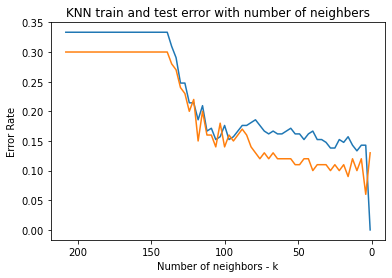

Confusion Matrix
 [[25  5]
 [ 1 69]]
True positive rate:  0.8333333333333334
True negative rate:  0.9857142857142858
Precision:  0.9324324324324325
F1 Score:  0.9583333333333333


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score

test_error = []
train_error = []
knn_value = []

train_data = train_df.iloc[:, :-1]   
train_label = train_df.iloc[:,-1]
test_data = test_df.iloc[:, :-1]
test_label = test_df.iloc[:,-1]


# fit(X, y) -  Fit the k-nearest neighbors classifier from the training dataset. 
#              X is training data. Y is target value. 
#              Return the fitted k-nearest neighbors classifier.
# predict(X) - Predict the class labels for the provided data. 
#              X is test sample and return Y: Class labels for each data sample.
for i in range (208, 0, -3):
  knnNeighbors = KNeighborsClassifier(n_neighbors=i)
  # fit to the model size
  knnNeighbors.fit(train_data, train_label)
  # Error = 1 - accuracy 
  train_error.append(1 - knnNeighbors.score(train_data, train_label))
  test_error.append(1 - knnNeighbors.score(test_data, test_label))
  knn_value.append(i)    

plt.title('KNN train and test error with number of neighbers')  
plt.plot(knn_value, train_error, label = 'Training Error Rate')
plt.plot(knn_value, test_error, label = 'Test Error Rate')
plt.gca().invert_xaxis()    # reverse x-axis value
plt.xlabel('Number of neighbors - k')
plt.ylabel('Error Rate')
plt.show()

min_error = min(test_error)
best_k_value = knn_value[test_error.index(min_error)]

# Create a model for confusion matrix
# .confusion_matrix(target, .predict(test_data))
matrix_model = KNeighborsClassifier(n_neighbors = best_k_value)  # minimum test error rate
matrix_model.fit(train_data, train_label)
m = confusion_matrix(test_label, matrix_model.predict(test_data))

# TN FP
# FN TP
TP = m[0][0]
TN = m[1][1]
FP = m[1][0]
FN = m[0][1]
# True positive rate (TPR - Sensitivity) = TP/TP+FN
# True negative rate (TNR - Specificity) = TN/TN+FP
# False positive rate (FPR): is a measure of accuracy for a test, the probability 
#                            of falsely rejecting the null h  ypothesis.
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)

print("Confusion Matrix\n", m)
print("True positive rate: ", TPR)
print("True negative rate: ", TNR)
# Precision_Score  = TP / (TP + FP)
print("Precision: ", precision_score(test_label, matrix_model.predict(test_data)))
# F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score: ", f1_score(test_label, matrix_model.predict(test_data)))



iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

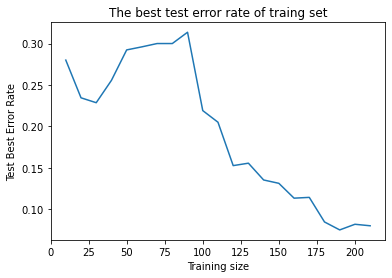

In [34]:
# first ⌊N/3⌋ rows of Class 0 & first N − ⌊N/3⌋ rows of Class 1 
# k value is always less than N (training size)

k_value = []
best_error_arr = []
train_error_C3 = []
test_error_C3 = []
k_size = []

for i in range (10,215,10):
  class0 = i//3
  class1 = i - class0

  train_data = pd.concat([df[df["class"]==0][:class0], df[df["class"]==1][:class1]])
  train_label = train_data.iloc[:,-1]
  test_data = pd.concat([df[df["class"]==0][class0:], df[df["class"]==1][class1:]])
  test_label = test_data.iloc[:,-1]

  k_size.append(i)
  
  knnNeighbors = KNeighborsClassifier(n_neighbors=i)
  # fit to the model size
  knnNeighbors.fit(train_data, train_label)
  # Error = 1 - accuracy 
  train_error_C3.append(1 - knnNeighbors.score(train_data, train_label))
  test_error_C3.append(1 - knnNeighbors.score(test_data, test_label))
  k_value.append(i)   

  best_error = 250
  # Get the best error value
  # ex: run 1, 6 and end is 10
  for i in range (1, i, 5):
    knnNeighbors = KNeighborsClassifier(n_neighbors=i)
    knnNeighbors.fit(train_data, train_label)
    error = 1 - knnNeighbors.score(test_data, test_label)

    if error < best_error:
      best_error = error
  best_error_arr.append(best_error)


plt.title('The best test error rate of traing set')  
plt.plot(k_size, best_error_arr)
plt.xlabel('Training size')
plt.ylabel('Test Best Error Rate')
plt.show()

### Let us further explore some variants of KNN. 

### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:
- A. which becomes Manhattan Distance with p = 1.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score

test_error = []
knn_value = []
for i in range (1, 200, 5):
  # becomes Manhattan Distance with p = 1
  knnNeighbors = KNeighborsClassifier(n_neighbors=i, p=1)
  knnNeighbors.fit(train_data, train_label)
  test_error.append(1 - knnNeighbors.score(test_data, test_label))
  knn_value.append(i)

min_error = min(test_error)
best_k = knn_value[test_error.index(min_error)]
print("K-value: ", best_k)

# becomes Manhattan Distance with p = 1
# minimum test error rate
matrix_model = KNeighborsClassifier(n_neighbors = best_k, p = 1)  
matrix_model.fit(train_data, train_label)
m = confusion_matrix(test_label, matrix_model.predict(test_data))

TP = m[0][0]
TN = m[1][1]
FP = m[1][0]
FN = m[0][1]

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)

print("Confusion Matrix\n", m)
print("True positive rate: ", TPR)
print("True negative rate: ", TNR)
# Precision_Score  = TP / (TP + FP)
print("Precision: ", precision_score(test_label, matrix_model.predict(test_data)))
# F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score: ", f1_score(test_label, matrix_model.predict(test_data)))



K-value:  6
Confusion Matrix
 [[23  7]
 [ 2 68]]
True positive rate:  0.7666666666666667
True negative rate:  0.9714285714285714
Precision:  0.9066666666666666
F1 Score:  0.9379310344827586


B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score

test_error = []
knn_value = []

for i in range (1, 11):
  mlog = 10**(i/10)

  knnNeighbors = KNeighborsClassifier(n_neighbors=best_k, p=mlog)
  knnNeighbors.fit(train_data, train_label)
  test_error.append(1 - knnNeighbors.score(test_data, test_label))
  knn_value.append(i/10)

min_error = min(test_error)
best_k = knn_value[test_error.index(min_error)]
print(best_k)

0.6


C. which becomes Chebyshev Distance with p → ∞ 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
import math

test_error = []
knn_value = []
for i in range (1, 200, 5):

  knnNeighbors = KNeighborsClassifier(n_neighbors=i, p= math.inf)
  knnNeighbors.fit(train_data, train_label)
  test_error.append(1 - knnNeighbors.score(test_data, test_label))
  knn_value.append(i)

min_error = min(test_error)
best_k = knn_value[test_error.index(min_error)]
print(best_k)

16


ii. Mahalanobis Distance.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

test_error = []
knn_value = []

mahalanobis_Matrix = np.cov(train_data, bias = True)
mahalanobis_Matrix = np.linalg.inv(mahalanobis_Matrix)

for i in range (1, 200, 5):

  knnNeighbors = KNeighborsClassifier(n_neighbors=i, metric="mahalanobis", 
                                      algorithm = "brute", 
                                      metric_params = {'VI': mahalanobis_Matrix})
  knnNeighbors.fit(train_data, train_label)
  test_error.append(1 - knnNeighbors.score(test_data, test_label))
  knn_value.append(i)

min_error = min(test_error)
print(min_error)
best_k = knn_value[test_error.index(min_error)]
print(best_k)

0.30000000000000004
121


(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [39]:
# sklearn.neighbors.KNeighborsClassifier(n_neighbors= num, weights=‘distance’)
# ‘distance’: weight points by the inverse of their distance. In this case, 
#             closer neighbors of a query point will have a greater influence 
#             than neighbors which are further away.

In [40]:
# Euclidean
from sklearn.neighbors import KNeighborsClassifier

test_error = []
train_error = []
knn_value = []

train_data = train_df.iloc[:, :-1]   
train_label = train_df.iloc[:,-1]
test_data = test_df.iloc[:, :-1]
test_label = test_df.iloc[:,-1]

for i in range (1, 200, 5):
  knnNeighbors = KNeighborsClassifier(n_neighbors=i, weights='distance')
  # fit to the model size
  knnNeighbors.fit(train_data, train_label)
  # Error = 1 - accuracy 
  train_error.append(1 - knnNeighbors.score(train_data, train_label))
  test_error.append(1 - knnNeighbors.score(test_data, test_label))
  knn_value.append(i)    

min_error = min(test_error)
print("Euclidean - test error: ", min_error)
best_k = knn_value[test_error.index(min_error)]
print("Euclidean - K-value: ", best_k)

Euclidean - test error:  0.09999999999999998
Euclidean - K-value:  6


In [41]:
# Manhattan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score

test_error = []
knn_value = []
for i in range (1, 200, 5):
  # becomes Manhattan Distance with p = 1
  knnNeighbors = KNeighborsClassifier(n_neighbors=i, p=1, weights='distance')
  knnNeighbors.fit(train_data, train_label)
  test_error.append(1 - knnNeighbors.score(test_data, test_label))
  knn_value.append(i)

min_error = min(test_error)
print("Manhattan - test error: ", min_error)
best_k = knn_value[test_error.index(min_error)]
print("Manhattan - K-value: ", best_k)

Manhattan - test error:  0.09999999999999998
Manhattan - K-value:  26


In [42]:
# Chebyshev
from sklearn.neighbors import KNeighborsClassifier
import math

test_error = []
knn_value = []
for i in range (1, 200, 5):

  knnNeighbors = KNeighborsClassifier(n_neighbors=i, p= math.inf, weights='distance')
  knnNeighbors.fit(train_data, train_label)
  test_error.append(1 - knnNeighbors.score(test_data, test_label))
  knn_value.append(i)

min_error = min(test_error)
print("Chebyshev - test error: ", min_error)
best_k = knn_value[test_error.index(min_error)]
print("Chebyshev - K-value: ", best_k)

Chebyshev - test error:  0.10999999999999999
Chebyshev - K-value:  16


(f) What is the lowest training error rate you achieved in this homework?

**Answer: The lowest training error rate I got is 0.**